In [293]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import pickle
from sklearn.preprocessing import LabelEncoder

In [294]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20231108.csv")

DATA SUMMARY

In [295]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,3/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,6/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [296]:
df.shape

(1048575, 29)

In [297]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [298]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,671726.000000,973774.000000,973774.000000,1.048558e+06,1.048545e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,10869.615543,40.578950,-73.664799,3.209160e-01,1.479193e-03,5.416589e-02,7.095344e-04,2.890780e-02,1.239778e-04,2.339709e-01,6.227499e-04,4.035830e+06
std,541.478142,2.437097,4.615447,7.026857e-01,4.069769e-02,2.389181e-01,2.736944e-02,1.699606e-01,1.121917e-02,6.655554e-01,2.693250e-02,3.039413e+05
min,10000.000000,0.000000,-201.359990,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.405265e+06
25%,10453.000000,40.667344,-73.970480,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.772680e+06
50%,11208.000000,40.719760,-73.922560,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.036928e+06
75%,11249.000000,40.774292,-73.863560,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.299194e+06
max,11697.000000,41.126150,0.000000,4.000000e+01,8.000000e+00,2.700000e+01,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+01,4.000000e+00,4.664283e+06


### Handling Redundant Columns


In [299]:
df.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           376665
ZIP CODE                          376849
LATITUDE                           74801
LONGITUDE                          74801
LOCATION                           74801
ON STREET NAME                    257014
CROSS STREET NAME                 542994
OFF STREET NAME                   792889
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              30
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       3746
CONTRIBUTING FACTOR VEHICLE 2     178476
CONTRIBUTING FACTOR VEHICLE 3     970987
CONTRIBUTING FACTOR VEHICLE 4    1030527
CONTRIBUTING FACTOR VEHICLE 5    1043539
COLLISION_ID                           0
VEHICLE TYPE COD

In [300]:
columns_to_remove = [
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
    'OFF STREET NAME',
    'LOCATION',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5',
    'LATITUDE',
    'LONGITUDE',
    'CROSS STREET NAME',
    'COLLISION_ID'
]
df = df.drop(columns_to_remove, axis=1, errors='ignore')

In [301]:
df.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          376665
ZIP CODE                         376849
ON STREET NAME                   257014
NUMBER OF PERSONS INJURED            17
NUMBER OF PERSONS KILLED             30
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      3746
VEHICLE TYPE CODE 1                8659
dtype: int64

In [302]:
# df = df.dropna()

### Data Type Conversion

In [303]:
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'])

df.drop(['CRASH DATE'], axis=1, inplace=True)

In [304]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].astype('object')
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].astype('object')

In [305]:
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce').fillna(-1).astype(int)

In [306]:
df.dtypes

CRASH TIME                               object
BOROUGH                                  object
ZIP CODE                                  int32
ON STREET NAME                           object
NUMBER OF PERSONS INJURED               float64
NUMBER OF PERSONS KILLED                float64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
VEHICLE TYPE CODE 1                      object
CRASH DATETIME                   datetime64[ns]
dtype: object

IMPUTING MISSING VALUES

In [307]:
df = df.dropna(subset=['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'])

# Replace missing values for categorical columns with the mode
categorical_columns = ['BOROUGH', 'ZIP CODE', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # mode()

In [308]:
df.isna().sum()

CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
VEHICLE TYPE CODE 1              0
CRASH DATETIME                   0
dtype: int64

In [309]:
df.shape

(1048539, 15)

### Duplicate Rows Handling

In [310]:
# Drop duplicates
df = df.drop_duplicates()
duplicates_after = df[df.duplicated()]
num_duplicates_after = duplicates_after.shape[0]
print("Number of duplicate rows after dropping:", num_duplicates_after)


Number of duplicate rows after dropping: 0


### Text Data Cleaning

In [311]:
#convert to lowercase

df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()

df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].str.lower()
df['BOROUGH'] = df['BOROUGH'].str.lower()
df['ON STREET NAME'] = df['ON STREET NAME'].str.lower()


In [312]:
df['CONTRIBUTING FACTOR VEHICLE 1'].str.count('unspecified').sum()


241411

### Outlier Detectiona and Handling

In [313]:
df.nunique()

CRASH TIME                         1440
BOROUGH                               5
ZIP CODE                            231
ON STREET NAME                    12508
NUMBER OF PERSONS INJURED            25
NUMBER OF PERSONS KILLED              6
NUMBER OF PEDESTRIANS INJURED         9
NUMBER OF PEDESTRIANS KILLED          4
NUMBER OF CYCLIST INJURED             4
NUMBER OF CYCLIST KILLED              3
NUMBER OF MOTORIST INJURED           24
NUMBER OF MOTORIST KILLED             5
CONTRIBUTING FACTOR VEHICLE 1        57
VEHICLE TYPE CODE 1                 933
CRASH DATETIME                   581217
dtype: int64

In [314]:
column_name = 'NUMBER OF PERSONS INJURED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PERSONS INJURED
0.0: 798331
1.0: 192877
2.0: 36937
3.0: 11740
4.0: 4352
5.0: 1654
6.0: 630
7.0: 272
8.0: 114
9.0: 49
10.0: 33
11.0: 20
12.0: 13
13.0: 10
15.0: 7
14.0: 5
16.0: 4
17.0: 4
18.0: 3
20.0: 2
19.0: 2
40.0: 1
22.0: 1
31.0: 1
27.0: 1


In [315]:
column_name = 'NUMBER OF PERSONS KILLED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PERSONS KILLED
0.0: 1045576
1.0: 1442
2.0: 36
3.0: 6
4.0: 2
8.0: 1


In [316]:
column_name = 'NUMBER OF PEDESTRIANS INJURED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PEDESTRIANS INJURED
0: 992633
1: 52457
2: 1754
3: 167
4: 31
5: 9
6: 8
7: 3
27: 1


In [317]:
column_name = 'NUMBER OF PEDESTRIANS KILLED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF PEDESTRIANS KILLED
0: 1046331
1: 725
2: 6
6: 1


In [318]:
column_name = 'NUMBER OF CYCLIST INJURED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF CYCLIST INJURED
0: 1017185
1: 29477
2: 388
3: 13


In [319]:
column_name = 'NUMBER OF MOTORIST INJURED' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF MOTORIST INJURED
0: 884931
1: 109908
2: 33807
3: 11394
4: 4269
5: 1630
6: 605
7: 257
8: 110
9: 49
10: 32
11: 20
12: 12
13: 10
15: 6
16: 5
14: 5
18: 3
17: 3
20: 2
19: 2
40: 1
21: 1
31: 1


In [320]:
column_name = 'NUMBER OF MOTORIST KILLED' 

value_counts = df[column_name].value_counts()

print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: NUMBER OF MOTORIST KILLED
0: 1046457
1: 569
2: 30
3: 6
4: 1


In [321]:
# Group rare categories into 'Other'
threshold = 10  
top_categories = df['VEHICLE TYPE CODE 1'].value_counts().index[:threshold]
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in top_categories else 'Other')


In [322]:
threshold = 22 
top_categories = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index[:threshold]
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: x if x in top_categories else 'Other')


In [323]:
column_name = 'CONTRIBUTING FACTOR VEHICLE 1' 

value_counts = df[column_name].value_counts()
print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: CONTRIBUTING FACTOR VEHICLE 1
driver inattention/distraction: 261955
unspecified: 241411
following too closely: 90790
failure to yield right-of-way: 72137
passing or lane usage improper: 46455
backing unsafely: 45454
passing too closely: 42218
unsafe lane changing: 33441
other vehicular: 30162
Other: 25378
turning improperly: 24635
traffic control disregarded: 20764
unsafe speed: 20642
driver inexperience: 17891
reaction to uninvolved vehicle: 16677
alcohol involvement: 12414
pavement slippery: 9601
view obstructed/limited: 8690
pedestrian/bicyclist/other pedestrian error/confusion: 7183
oversized vehicle: 6298
aggressive driving/road rage: 5478
brakes defective: 3908
fell asleep: 3481


In [324]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].replace('unspecified', 'risky behavior')


In [325]:
column_name = 'VEHICLE TYPE CODE 1' 

value_counts = df[column_name].value_counts()

print("Unique Values and Counts for Column:", column_name)
for value, count in value_counts.items():
    print(f"{value}: {count}")

Unique Values and Counts for Column: VEHICLE TYPE CODE 1
sedan: 500945
station wagon/sport utility vehicle: 369022
taxi: 43782
Other: 34679
pick-up truck: 28797
box truck: 19938
bus: 16886
bike: 11259
tractor truck diesel: 8348
van: 7296
motorcycle: 6111


In [326]:
def detect_outliers(df, columns):
    outlier_indices = []
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

numerical_columns = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]

outliers = detect_outliers(df, numerical_columns)
print("Outliers detected in the data:")
print(df.loc[outliers])
df_no_outliers = df.drop(outliers)


Outliers detected in the data:
        CRASH TIME   BOROUGH  ZIP CODE                    ON STREET NAME  \
0             2:39  brooklyn        -1             whitestone expressway   
1            11:45  brooklyn        -1           queensboro bridge upper   
524290        7:30  brooklyn        -1  harlem river drive                 
524293        7:40  brooklyn        -1  brooklyn queens expressway         
524294       10:10  brooklyn        -1  bruckner expressway                
...            ...       ...       ...                               ...   
524279       12:30     bronx     10462  zerega avenue                      
524282       22:55  brooklyn     11221  bushwick avenue                    
1048572       2:59  brooklyn     11221  madison street                     
524285       22:40     bronx     10454  willis avenue                      
524287        9:55  brooklyn     11203  schenectady avenue                 

         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KI

### Feature Engineering

In [327]:

df['WEEKEND'] = (df['CRASH DATETIME'].dt.dayofweek >= 5).astype(int)


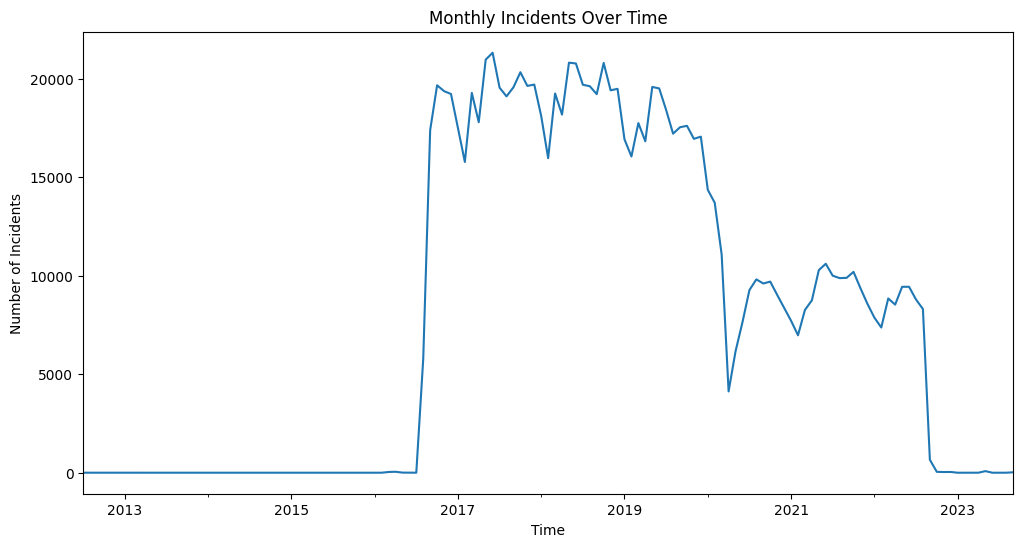

In [328]:
# Time Series Line Chart for Incidents Over Time
plt.figure(figsize=(12, 6))
df['CRASH DATETIME'] = pd.to_datetime(df['CRASH DATETIME'])
df.resample('M', on='CRASH DATETIME').size().plot()
plt.title('Monthly Incidents Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.show()

In [329]:
df.drop([ 'CRASH DATETIME'], axis=1, inplace=True)

In [330]:
df.head()

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,WEEKEND
0,2:39,brooklyn,-1,whitestone expressway,2.0,0.0,0,0,0,0,2,0,aggressive driving/road rage,sedan,1
1,11:45,brooklyn,-1,queensboro bridge upper,1.0,0.0,0,0,0,0,1,0,pavement slippery,sedan,1
2,6:55,brooklyn,-1,throgs neck bridge,0.0,0.0,0,0,0,0,0,0,following too closely,sedan,0
3,9:35,brooklyn,11208,belt parkway,0.0,0.0,0,0,0,0,0,0,risky behavior,sedan,1
4,8:13,brooklyn,11233,saratoga avenue,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,sedan,0


In [331]:
df['PERSONS KILLED'] = (df['NUMBER OF PERSONS KILLED'] > 0).astype(int)
df.drop(columns=['NUMBER OF PERSONS KILLED'], inplace=True)


In [332]:
df['PERSONS INJURED'] = (df['NUMBER OF PERSONS INJURED'] > 0).astype(int)
df.drop(columns=['NUMBER OF PERSONS INJURED'], inplace=True)


In [333]:

df['NUMBER OF MOTORIST INJURED'] = (df['NUMBER OF MOTORIST INJURED'] > 0).astype(int)


In [334]:

df['NUMBER OF PEDESTRIANS INJURED'] = (df['NUMBER OF PEDESTRIANS INJURED'] > 0).astype(int)

## EDA

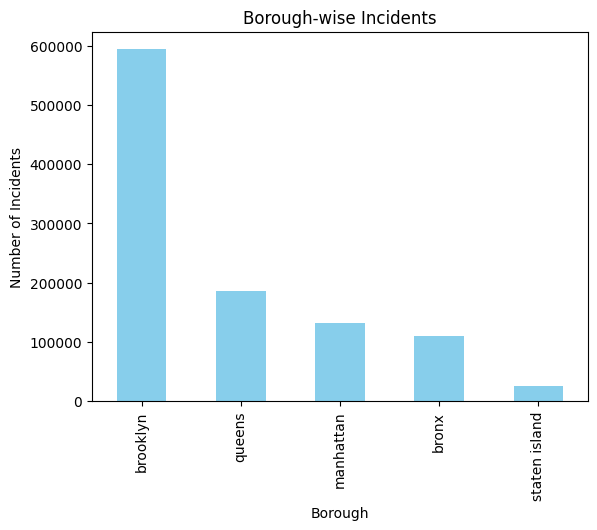

In [335]:
# Bar Chart for Borough-wise Incidents
borough_counts = df['BOROUGH'].value_counts()
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Borough-wise Incidents')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()

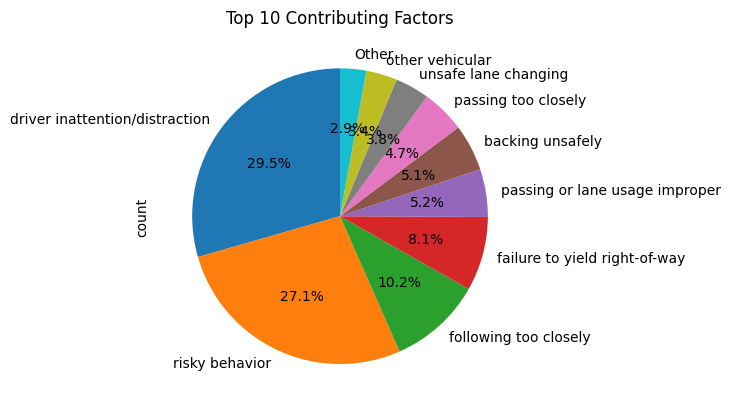

In [336]:
contributing_factor_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
contributing_factor_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Contributing Factors')
plt.show()

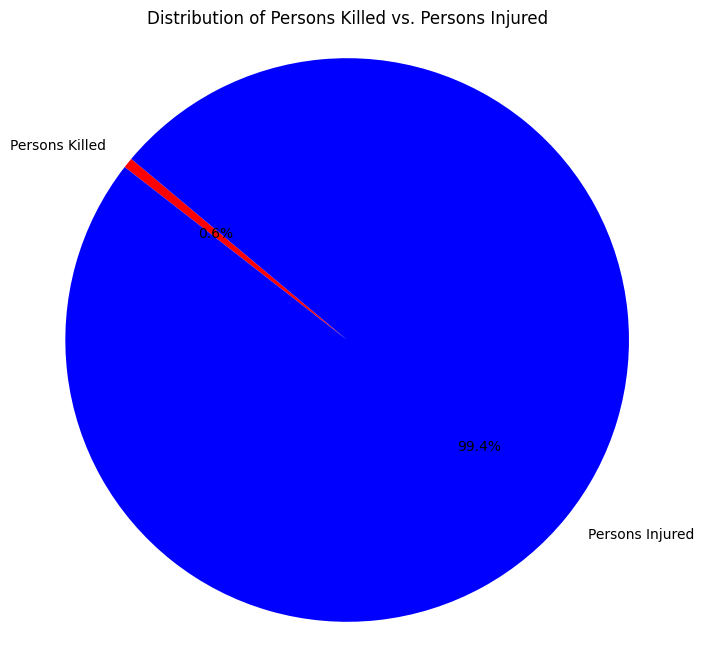

In [337]:
total_killed = df['PERSONS KILLED'].sum()
total_injured = df['PERSONS INJURED'].sum()

labels = ['Persons Killed', 'Persons Injured']
sizes = [total_killed, total_injured]
colors = ['red', 'blue']  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Persons Killed vs. Persons Injured')
plt.axis('equal')  

plt.show()

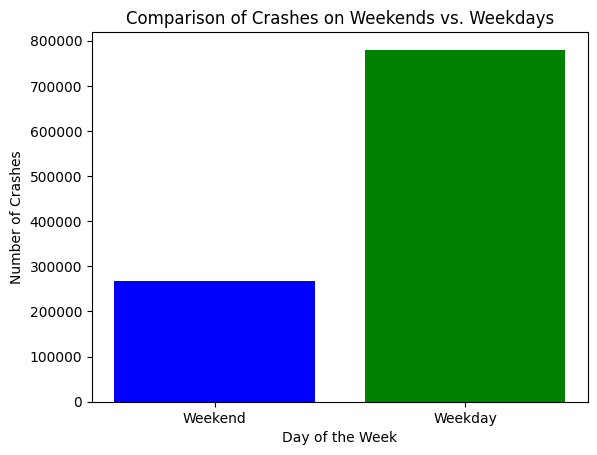

In [338]:
weekend_crashes = df[df['WEEKEND'] == 1].shape[0]
weekday_crashes = df[df['WEEKEND'] == 0].shape[0]

categories = ['Weekend', 'Weekday']
crash_counts = [weekend_crashes, weekday_crashes]

plt.bar(categories, crash_counts, color=['blue', 'green'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Comparison of Crashes on Weekends vs. Weekdays')
plt.show()

c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


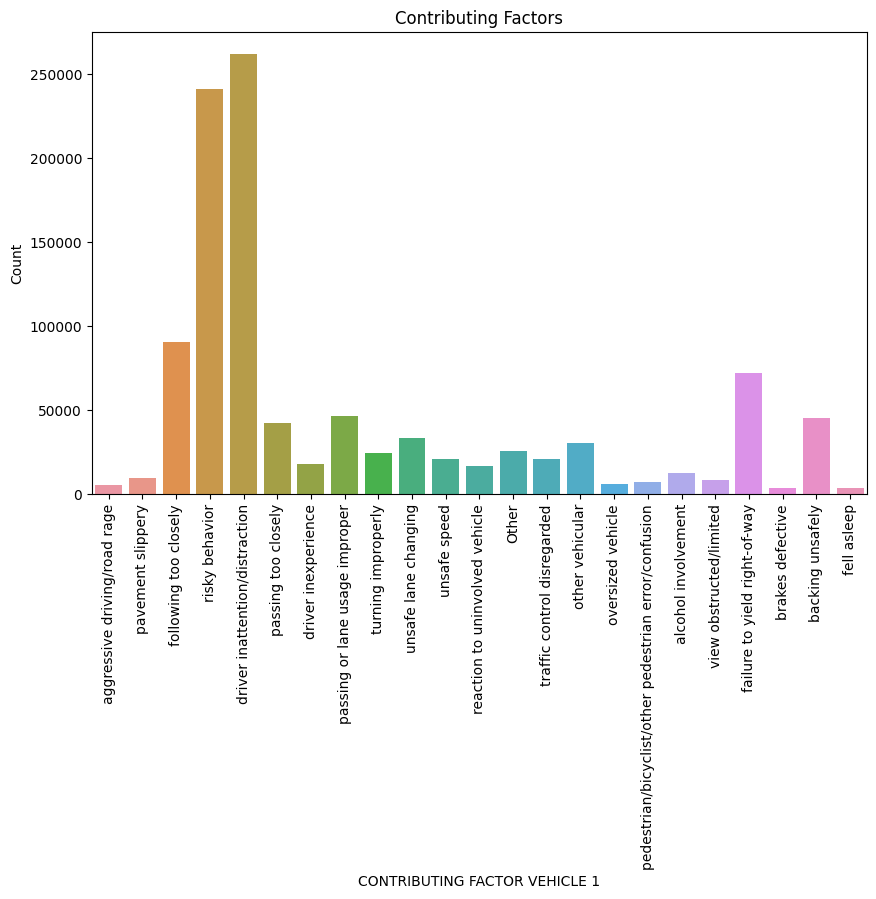

In [339]:
# Visualization: Count plot for 'CONTRIBUTING FACTOR VEHICLE 1'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CONTRIBUTING FACTOR VEHICLE 1')
plt.xlabel('CONTRIBUTING FACTOR VEHICLE 1')
plt.ylabel('Count')
plt.title('Contributing Factors')
plt.xticks(rotation=90)
plt.show()

c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


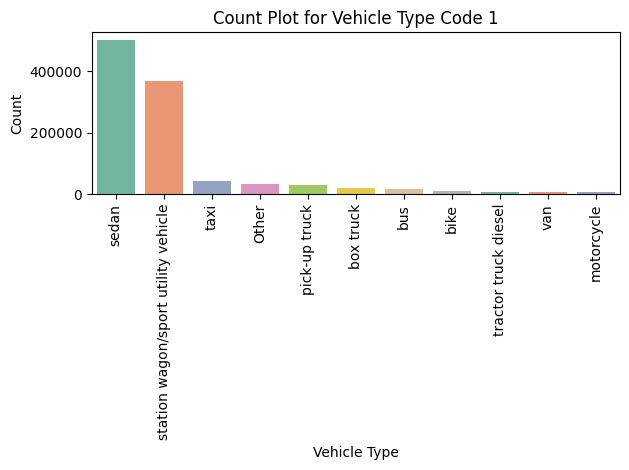

In [340]:
sns.countplot(data=df, x='VEHICLE TYPE CODE 1', order=df['VEHICLE TYPE CODE 1'].value_counts().index, palette='Set2')

plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count Plot for Vehicle Type Code 1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the plot fits within the figure
plt.show()

In [341]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


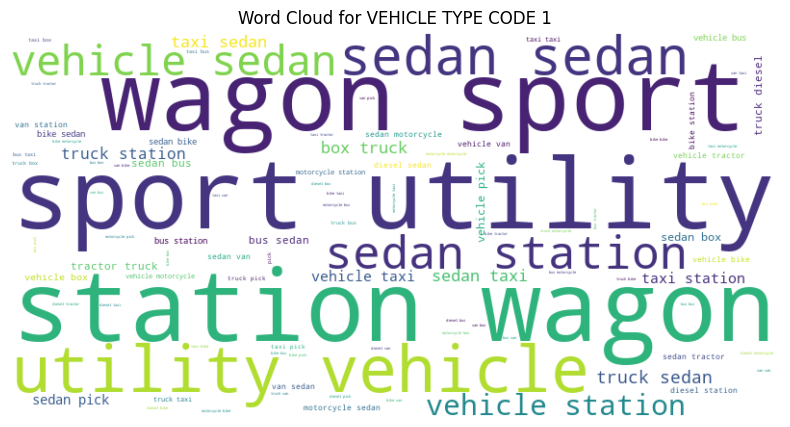

In [342]:
from wordcloud import WordCloud
selected_column = 'VEHICLE TYPE CODE 1'  
text = ' '.join(df[selected_column].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {selected_column}')
plt.show()


Class Imbalance

In [343]:
class_counts = df['NUMBER OF PEDESTRIANS INJURED'].value_counts()
print(class_counts)

NUMBER OF PEDESTRIANS INJURED
0    992633
1     54430
Name: count, dtype: int64


In [344]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [345]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['NUMBER OF PEDESTRIANS INJURED'])
y = df['NUMBER OF PEDESTRIANS INJURED']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X, y)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['NUMBER OF PEDESTRIANS INJURED'] = y_resampled

df = resampled_data.copy() 
print(df['NUMBER OF PEDESTRIANS INJURED'].value_counts())


c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


NUMBER OF PEDESTRIANS INJURED
0    54430
1    54430
Name: count, dtype: int64


In [346]:
print(X_resampled.shape, y_resampled.shape)


(108860, 14) (108860,)


In [347]:
df.shape

(108860, 15)

c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


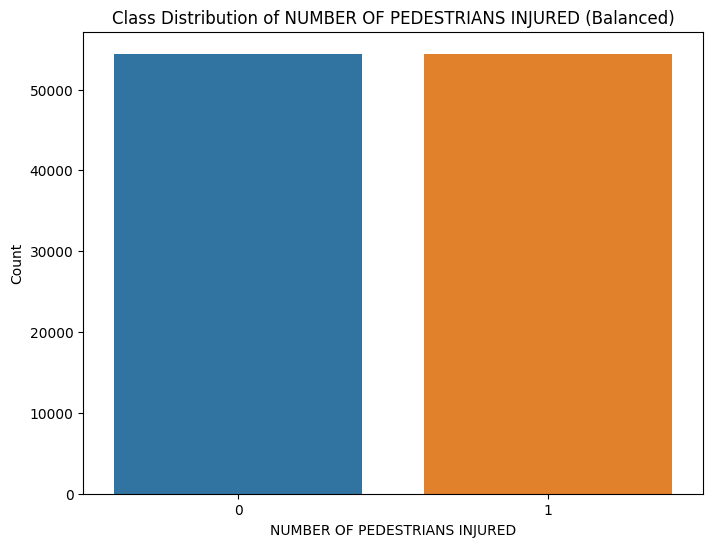

In [348]:

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NUMBER OF PEDESTRIANS INJURED')
plt.title('Class Distribution of NUMBER OF PEDESTRIANS INJURED (Balanced)')
plt.xlabel('NUMBER OF PEDESTRIANS INJURED')
plt.ylabel('Count')
plt.show()
plt.show()


c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


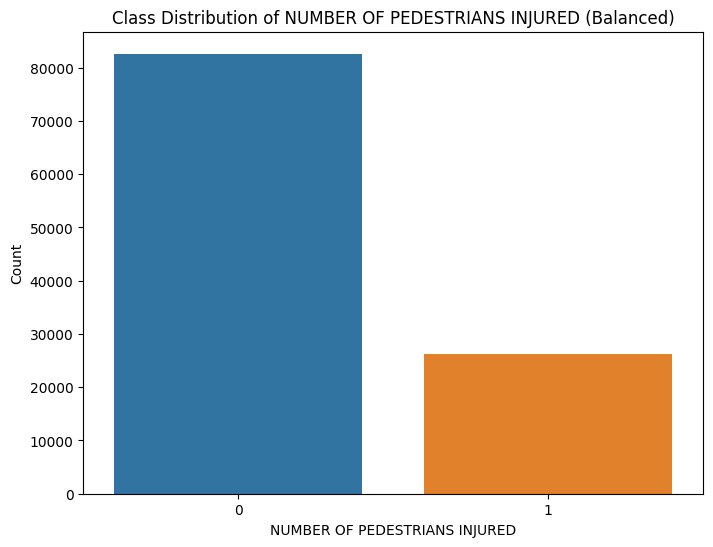

In [349]:

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='WEEKEND')
plt.title('Class Distribution of NUMBER OF PEDESTRIANS INJURED (Balanced)')
plt.xlabel('NUMBER OF PEDESTRIANS INJURED')
plt.ylabel('Count')
plt.show()
plt.show()


In [350]:
df['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['unsafe lane changing', 'driver inattention/distraction',
       'unsafe speed', 'following too closely',
       'traffic control disregarded', 'passing too closely',
       'turning improperly', 'other vehicular', 'risky behavior',
       'backing unsafely', 'failure to yield right-of-way',
       'view obstructed/limited',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'oversized vehicle', 'passing or lane usage improper', 'Other',
       'brakes defective', 'alcohol involvement',
       'reaction to uninvolved vehicle', 'driver inexperience',
       'pavement slippery', 'aggressive driving/road rage', 'fell asleep'],
      dtype=object)

In [351]:
df['VEHICLE TYPE CODE 1'].unique()

array(['Other', 'sedan', 'station wagon/sport utility vehicle', 'taxi',
       'tractor truck diesel', 'bus', 'box truck', 'pick-up truck',
       'motorcycle', 'bike', 'van'], dtype=object)

In [352]:
df['BOROUGH'].unique()

array(['manhattan', 'brooklyn', 'queens', 'bronx', 'staten island'],
      dtype=object)

In [353]:
df['NUMBER OF CYCLIST INJURED'].unique()

array([0, 1, 2], dtype=int64)

In [354]:
df = df.drop('CRASH TIME', axis=1)


### Encoding Categorical Variables

In [355]:
categorical_columns = ['BOROUGH', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1']
encoders = {}

for col in categorical_columns:
    df[col] = df[col].astype(str)
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    
    # Saved each encoder to a .pkl file
    with open(f'models/{col}_encoder.pkl', 'wb') as file:
        pickle.dump(encoders[col], file)


c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\deven\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

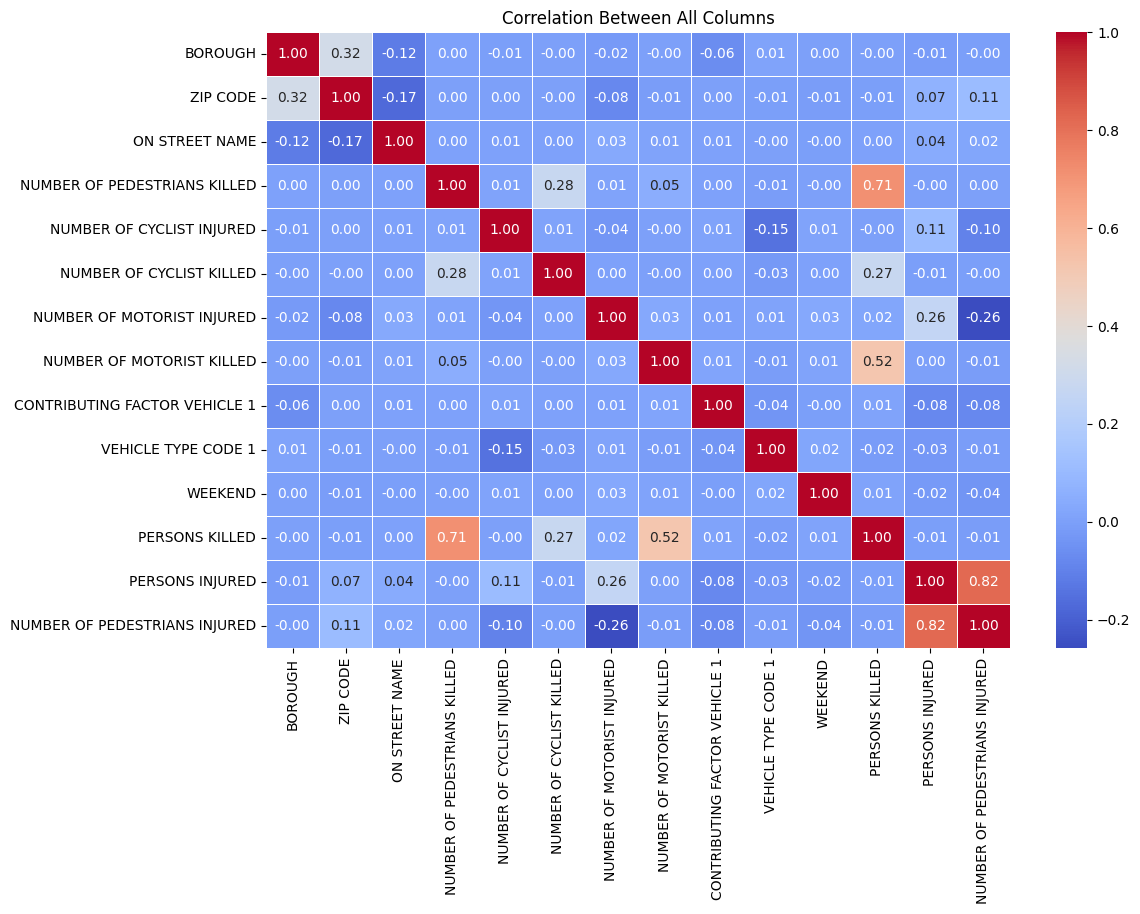

In [356]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between All Columns')
plt.show()

In [358]:
df.head(1)

,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,WEEKEND,PERSONS KILLED,PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED
164037,2,10013,1858,0,0,0,0,0,20,0,0,0,0,0


Train Test Split

In [375]:

X = df.drop(['NUMBER OF PEDESTRIANS INJURED','PERSONS INJURED','ZIP CODE','ON STREET NAME','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','PERSONS KILLED','PERSONS INJURED'], axis=1)  # Features
y = df['NUMBER OF PEDESTRIANS INJURED']  # Target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Logistic Regression

In [376]:
warnings.filterwarnings('ignore')

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Training 
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[3899 6878]
 [1904 9091]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.36      0.47     10777
           1       0.57      0.83      0.67     10995

    accuracy                           0.60     21772
   macro avg       0.62      0.59      0.57     21772
weighted avg       0.62      0.60      0.57     21772

Accuracy: 0.5966


ROC Curve

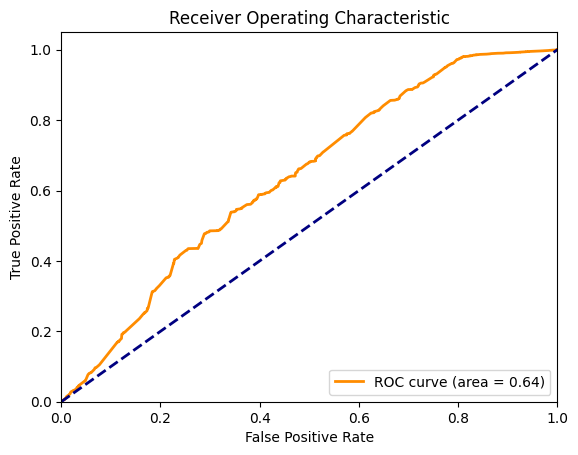

In [377]:
# Assuming your pipeline is named 'pipeline'
y_scores = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest

In [378]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

#confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Model Confusion Matrix:")
print(cm_rf)

# classification report
cr_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Model Classification Report:")
print(cr_rf)

# accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")

Random Forest Model Confusion Matrix:
[[5818 4959]
 [1448 9547]]
Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.64     10777
           1       0.66      0.87      0.75     10995

    accuracy                           0.71     21772
   macro avg       0.73      0.70      0.70     21772
weighted avg       0.73      0.71      0.70     21772

Random Forest Model Accuracy: 0.7057


 Feature Importance Plot

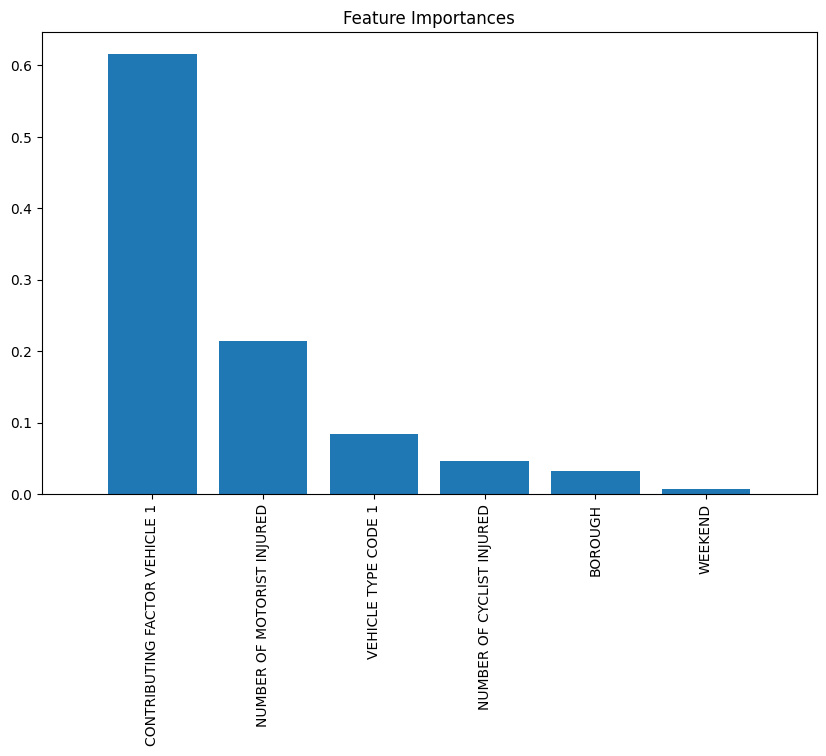

In [379]:
importances = rf_classifier.feature_importances_
indices = importances.argsort()[::-1]
num_features = len(X_train.columns) 

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(num_features), importances[indices[:num_features]])
plt.xticks(range(num_features), X_train.columns[indices[:num_features]], rotation=90)
plt.xlim([-1, num_features])
plt.show()


Naive Byea

In [380]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

#confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Model Confusion Matrix:")
print(cm_nb)

#classification report
cr_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Model Classification Report:")
print(cr_nb)

#accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Model Accuracy: {accuracy_nb:.4f}")

Naive Bayes Model Confusion Matrix:
[[ 2071  8706]
 [  235 10760]]
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.19      0.32     10777
           1       0.55      0.98      0.71     10995

    accuracy                           0.59     21772
   macro avg       0.73      0.59      0.51     21772
weighted avg       0.72      0.59      0.51     21772

Naive Bayes Model Accuracy: 0.5893


Precision-Recall Curve

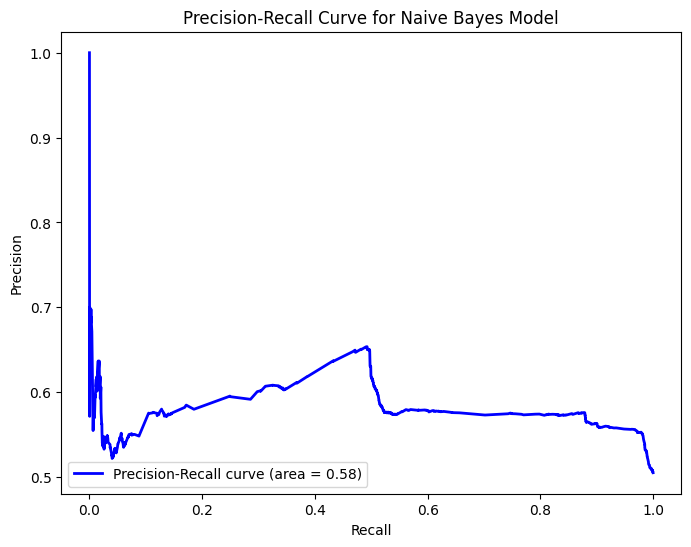

In [381]:
y_scores_nb = gnb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_nb)
auc_precision_recall = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % auc_precision_recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes Model')
plt.legend(loc="lower left")
plt.show()

KNN

In [382]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipeline.fit(X_train, y_train)
y_pred_knn = pipeline.predict(X_test)

#confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Model Confusion Matrix:")
print(cm_knn)

#classification report
cr_knn = classification_report(y_test, y_pred_knn)
print("KNN Model Classification Report:")
print(cr_knn)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN Model: {accuracy:.4f}")


KNN Model Confusion Matrix:
[[7829 2948]
 [4350 6645]]
KNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68     10777
           1       0.69      0.60      0.65     10995

    accuracy                           0.66     21772
   macro avg       0.67      0.67      0.66     21772
weighted avg       0.67      0.66      0.66     21772

Accuracy of KNN Model: 0.5966


ROC Curve

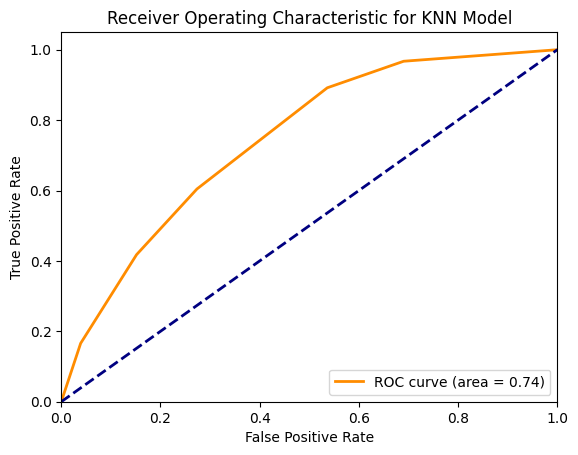

In [383]:
y_scores_knn = pipeline.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN Model')
plt.legend(loc="lower right")
plt.show()


Decision Tree

In [384]:

dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

#confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Model Confusion Matrix:")
print(cm_dt)

#classification report
cr_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Model Classification Report:")
print(cr_dt)

#accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.4f}")

Decision Tree Model Confusion Matrix:
[[5848 4929]
 [1466 9529]]
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65     10777
           1       0.66      0.87      0.75     10995

    accuracy                           0.71     21772
   macro avg       0.73      0.70      0.70     21772
weighted avg       0.73      0.71      0.70     21772

Decision Tree Model Accuracy: 0.7063


Confusion Matrix Visualization:

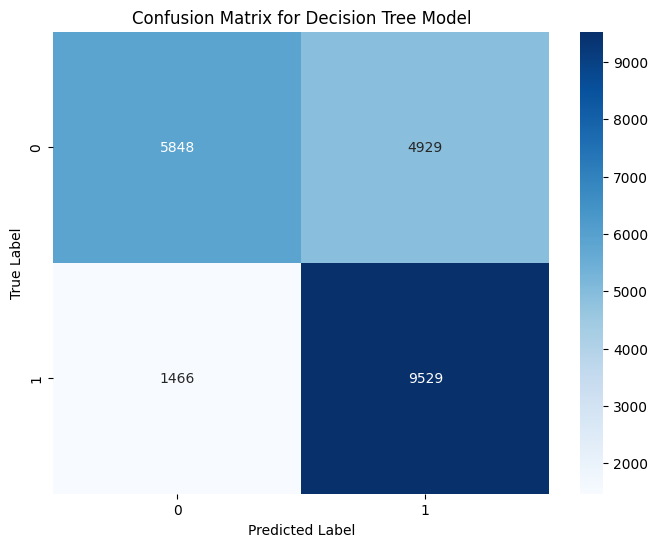

In [385]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
df.head(1)

,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,WEEKEND,PERSONS KILLED,PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED
54475,12:10,brooklyn,-1,belt parkway,0,0,0,1,0,Other,sedan,1,0,1,0


In [386]:
# for weekend or weekday prediction
X1 = df.drop(['WEEKEND','PERSONS INJURED','ZIP CODE','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST KILLED','ON STREET NAME'], axis=1)  # Features
y1 = df['WEEKEND']  # Target

# Splitting the dataset into the Training set and Test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

XGBoost

In [387]:
#for pedestrian injury
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

#confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Model Confusion Matrix:")
print(cm_xgb)

#classification report
cr_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Model Classification Report:")
print(cr_xgb)

#accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")

XGBoost Model Confusion Matrix:
[[5820 4957]
 [1410 9585]]
XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65     10777
           1       0.66      0.87      0.75     10995

    accuracy                           0.71     21772
   macro avg       0.73      0.71      0.70     21772
weighted avg       0.73      0.71      0.70     21772

XGBoost Model Accuracy: 0.7076


In [390]:
#for weekend or weekday
import xgboost as xgb
xgb_clf1 = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_clf1.fit(X_train1, y_train1)
y_pred_xgb1 = xgb_clf1.predict(X_test1)

#confusion matrix
cm_xgb1 = confusion_matrix(y_test1, y_pred_xgb1)
print("XGBoost Model Confusion Matrix:")
print(cm_xgb1)

#classification report
cr_xgb1 = classification_report(y_test1, y_pred_xgb1)
print("XGBoost Model Classification Report:")
print(cr_xgb1)

#accuracy
accuracy_xgb1 = accuracy_score(y_test1, y_pred_xgb1)
print(f"XGBoost Model Accuracy: {accuracy_xgb1:.4f}")

XGBoost Model Confusion Matrix:
[[16351    80]
 [ 5277    64]]
XGBoost Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     16431
           1       0.44      0.01      0.02      5341

    accuracy                           0.75     21772
   macro avg       0.60      0.50      0.44     21772
weighted avg       0.68      0.75      0.65     21772

XGBoost Model Accuracy: 0.7540


In [391]:
df.nunique()

BOROUGH                             5
ZIP CODE                          212
ON STREET NAME                   6403
NUMBER OF PEDESTRIANS KILLED        4
NUMBER OF CYCLIST INJURED           3
NUMBER OF CYCLIST KILLED            3
NUMBER OF MOTORIST INJURED          2
NUMBER OF MOTORIST KILLED           3
CONTRIBUTING FACTOR VEHICLE 1      23
VEHICLE TYPE CODE 1                11
WEEKEND                             2
PERSONS KILLED                      2
PERSONS INJURED                     2
NUMBER OF PEDESTRIANS INJURED       2
dtype: int64

Feature Importance Plot

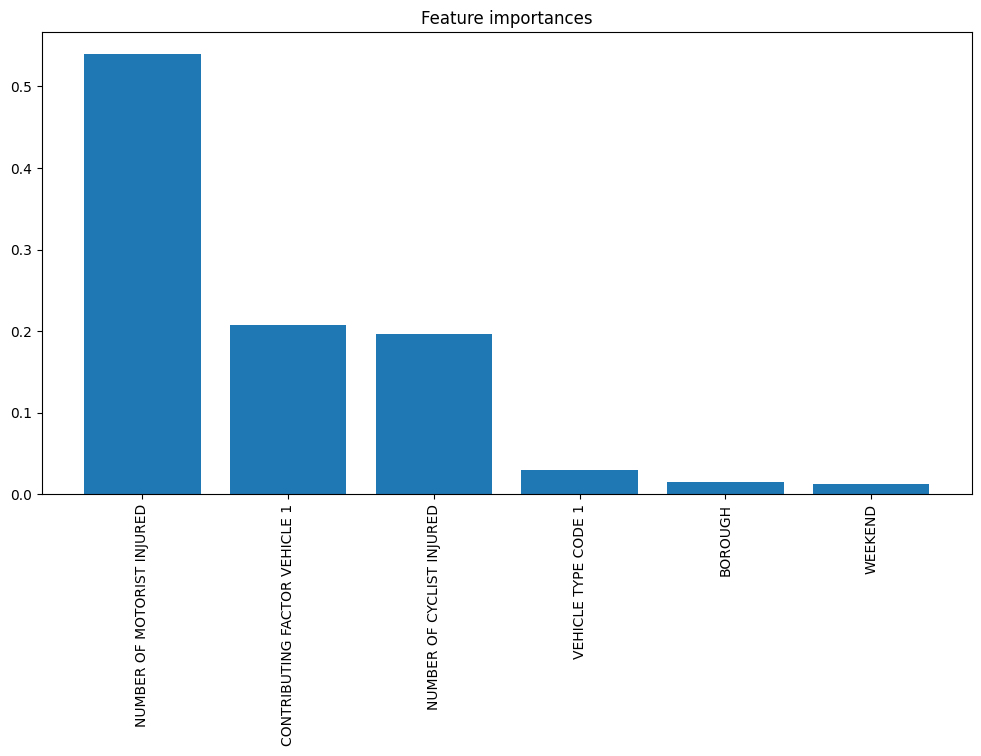

In [392]:
importances = xgb_clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.show()


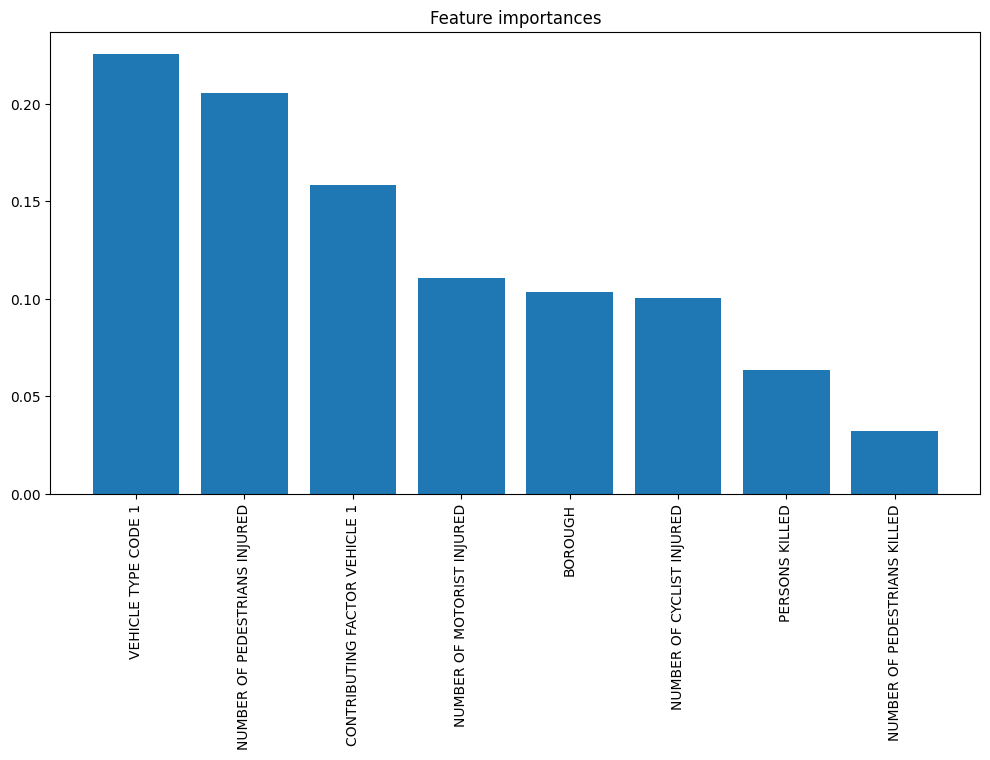

In [398]:
importances = xgb_clf1.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[sorted_idx])
plt.xticks(range(X_train1.shape[1]), X_train1.columns[sorted_idx], rotation=90)
plt.show()


In [393]:
df['NUMBER OF PEDESTRIANS KILLED'].unique()

array([0, 1, 2, 6], dtype=int64)

KMeans

In [394]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# clusters 
k = 3 
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['cluster'] = labels



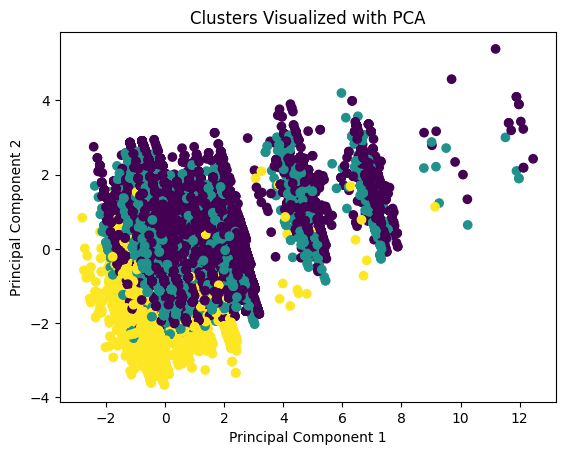

In [395]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized with PCA')
plt.show()


In [396]:
#for number of pedestrians injured #xgboost
import pickle
pickle.dump(xgb_clf, open('models/model.pkl', 'wb'))

In [397]:
#for the weekend or weekday #xgboost
import pickle
pickle.dump(xgb_clf1, open('models/model_weekend.pkl', 'wb'))